# How much agency do we have over our relationships?

### *Are internal-relationship factors better predictors of divorce than braoder structural conditions?* ###

This project analyses a large synthetic dataset comprised of features representing the demographic, interpersonal, contextual, and behavioural characteristics of couples (Patangan, 2025). We use this dataset to simulate the influence of structural and internal-relationship factors in divorce outcomes. This project connects sociological theory with mathmatical modelling to assess the dynamics contributing to marriage status. The research is grounded in discourse on family structure and relationship stability, identifing divorce causalities, and contributing to knowledge on preventive interventions (Scott et al., 2013). 

### Importing libraries

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Uploading dataset

In [143]:
divorce = pd.read_csv('divorce_df.csv')
divorce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age_at_marriage            5000 non-null   int64  
 1   marriage_duration_years    5000 non-null   int64  
 2   num_children               5000 non-null   int64  
 3   education_level            5000 non-null   object 
 4   employment_status          5000 non-null   object 
 5   combined_income            5000 non-null   int64  
 6   religious_compatibility    5000 non-null   object 
 7   cultural_background_match  5000 non-null   int64  
 8   communication_score        5000 non-null   float64
 9   conflict_frequency         5000 non-null   int64  
 10  conflict_resolution_style  5000 non-null   object 
 11  financial_stress_level     5000 non-null   float64
 12  mental_health_issues       5000 non-null   int64  
 13  infidelity_occurred        5000 non-null   int64

### Dividing dataset

We divide the dataset into internal and structural factors to independently examine the relational variables.

In [150]:
# creating two seperate dataframes for internal and structural factors 

internal_factors = divorce[
    [
        'communication_score',
        'conflict_frequency',
        'conflict_resolution_style',
        'infidelity_occurred',
        'counseling_attended',
        'social_support',
        'shared_hobbies_count',
        'domestic_violence_history',
        'trust_score',
        'divorced'
    ]
]

structural_factors = divorce[
    [
        'age_at_marriage',
        'marriage_duration_years',
        'num_children',
        'education_level',
        'combined_income',
        'cultural_background_match',
        'religious_compatibility',
        'mental_health_issues',
        'marriage_type',
        'social_support',
        'employment_status',
        'divorced'
    ]
]


### Descriptive Statistics

#### Exploring internal factors

In [151]:
# splitting columns into categorical binary, continuous, and categorical 

internal_binary_cols = [
    'infidelity_occurred',
    'counseling_attended', 
    'domestic_violence_history'
]



internal_continuous_cols = [
    'communication_score',
    'conflict_frequency', 
    'shared_hobbies_count',
    'trust_score'
]

internal_cat_cols = [
    'conflict_resolution_style'
]


In [152]:
# binary stats
internal_factors[internal_binary_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
infidelity_occurred,5000.0,0.1490,0.356124,0.0,0.0,0.0,0.0,1.0
counseling_attended,5000.0,0.2404,0.427369,0.0,0.0,0.0,0.0,1.0
domestic_violence_history,5000.0,0.0504,0.218791,0.0,0.0,0.0,0.0,1.0


In [153]:
# continuous stats
internal_factors[internal_continuous_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
communication_score,5000.0,6.040507,1.963349,1.0,4.661929,6.058246,7.426862,10.0
conflict_frequency,5000.0,2.008000,1.412351,0.0,1.000000,2.000000,3.000000,9.0
shared_hobbies_count,5000.0,2.972600,1.711735,0.0,2.000000,3.000000,4.000000,10.0
trust_score,5000.0,6.030525,1.932922,1.0,4.702663,6.034343,7.372830,10.0


In [154]:
# categorical stats
divorce[internal_cat_cols].describe(include='object')

,conflict_resolution_style
count,5000
unique,4
top,Collaborative
freq,2028


### Visualising internal factors statistics

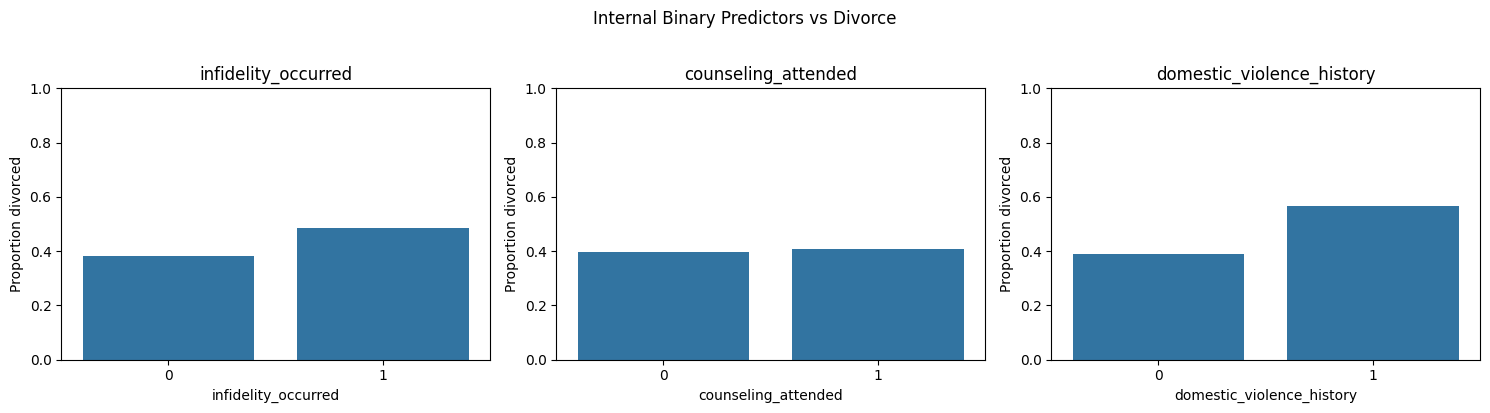

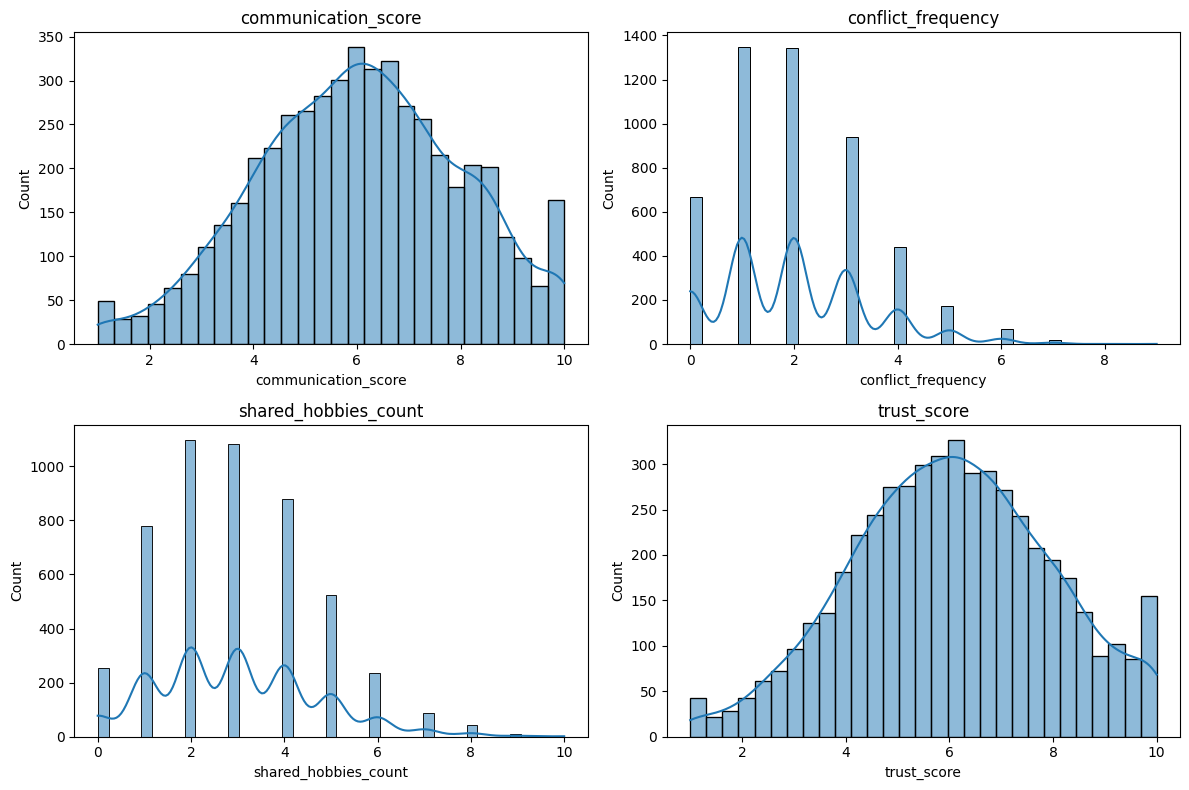

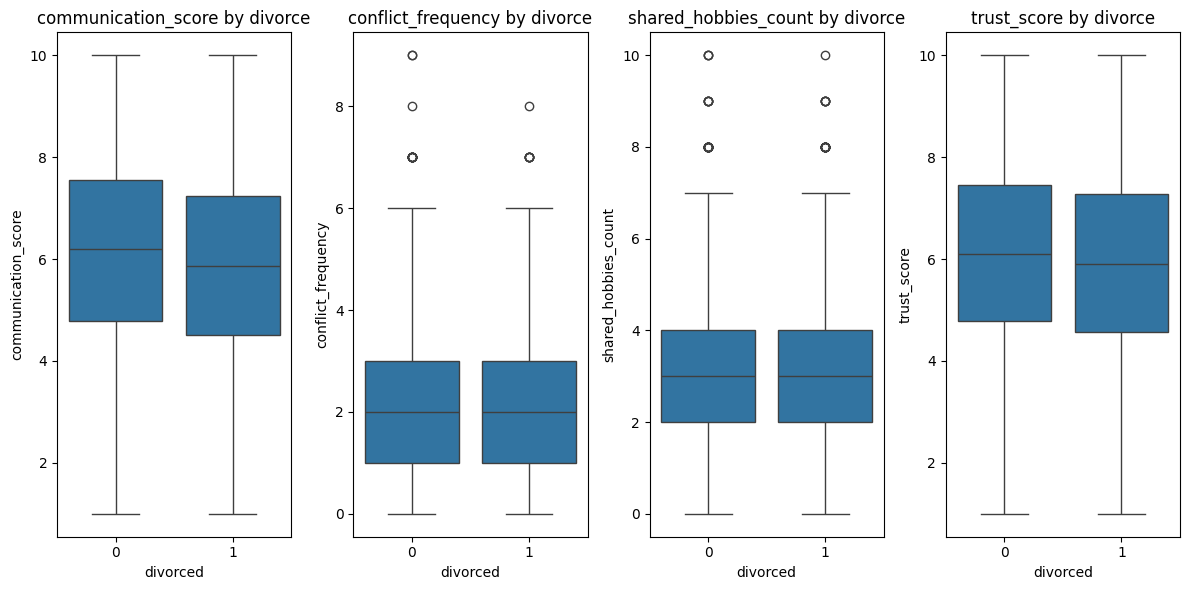

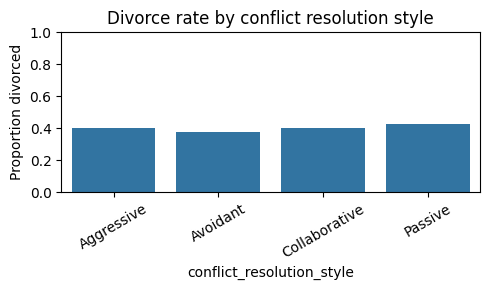

In [155]:
# side-by-side bar plots
fig, axes = plt.subplots(1, len(internal_binary_cols), figsize=(5*len(internal_binary_cols), 4))

if len(internal_binary_cols) == 1:
    axes = [axes]

for i, col in enumerate(internal_binary_cols):
    rate_df = internal_factors.groupby(col)['divorced'].mean().reset_index()
    sns.barplot(data=rate_df, x=col, y='divorced', ax=axes[i])
    axes[i].set_ylabel('Proportion divorced')
    axes[i].set_title(f'{col}')
    axes[i].set_ylim(0, 1)

plt.suptitle('Internal Binary Predictors vs Divorce', y=1.02)
plt.tight_layout()
plt.show()

## histograms for continuous variables
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  
axes = axes.flatten()

for i, col in enumerate(internal_continuous_cols):
    sns.histplot(data=internal_factors, x=col, kde=True, ax=axes[i])
    axes[i].set_title(col)


plt.tight_layout()
plt.show()

## boxplots for continuous variables by divorce status

fig, axes = plt.subplots(1, 4, figsize=(12, 6))
axes = axes.flatten()

for i, col in enumerate(internal_continuous_cols):
    sns.boxplot(data=internal_factors, x='divorced', y=col, ax=axes[i])
    axes[i].set_title(f'{col} by divorce')


plt.tight_layout()
plt.show()

## divorce rate by conflict resolution style 
rate_conflict = (divorce.groupby('conflict_resolution_style')['divorced'].mean().reset_index())

plt.figure(figsize=(5, 3))
sns.barplot(data=rate_conflict,
            x='conflict_resolution_style',
            y='divorced')
plt.ylabel('Proportion divorced')
plt.title('Divorce rate by conflict resolution style')
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

## Interpretation:
Infidelity occurring and domestic violence history are associated with a higher proportion of divorced couples. Counselling attended has little difference across divorced and non-divorced couples. 

Communication and trust scores are normally distributed with most data falling at the middle, suggesting similar mean, median, and mode values, located at the centre. The slight positive skew of shared hobbies and conflict frequency shows that most values are low, with a few outliers pulling the mean to the right.

Non-divorced couples typically have higher communication and trust score. There's no difference between typical shared hobbies count or conflict frequency and divorce status. 

Those with a passive conflict resolution style represent slightly more of the divorced couples, though there's no major differences across this axis. 

### Exploring structural factors

In [ ]:
# splitting columns into categorical binary, continuous, and categorical 

structural_binary_cols = [
    'mental_health_issues',
    'cultural_background_match',
    'religious_compatibility'
]

structural_continuous_cols = [
    'age_at_marriage',
    'marriage_duration_years',
    'num_children',
    'combined_income',
    'social_support'
]

structural_cat_cols = [
    'education_level',
    'employment_status',
    'marriage_type',
    'religious_compatibility',
    'cultural_background_match'
]

In [157]:
structural_factors[structural_binary_cols].describe()

,mental_health_issues,cultural_background_match
count,5000.000000,5000.000000
mean,0.203800,0.755400
std,0.402862,0.429893
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [158]:
structural_factors[structural_continuous_cols].describe()

,age_at_marriage,marriage_duration_years,num_children,combined_income,social_support
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,27.583600,9.171000,1.552800,60220.078400,5.966853
std,4.855978,8.848266,1.247527,19662.080982,1.965504
min,18.000000,1.000000,0.000000,10000.000000,1.000000
25%,24.000000,2.000000,1.000000,46666.000000,4.597007
50%,28.000000,6.000000,1.000000,60196.000000,6.010716
75%,31.000000,13.000000,2.000000,73666.500000,7.328916
max,45.000000,40.000000,6.000000,126909.000000,10.000000


In [159]:
structural_factors[structural_cat_cols].describe()

,cultural_background_match
count,5000.000000
mean,0.755400
std,0.429893
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


#### Visualisations for structural factors statistics

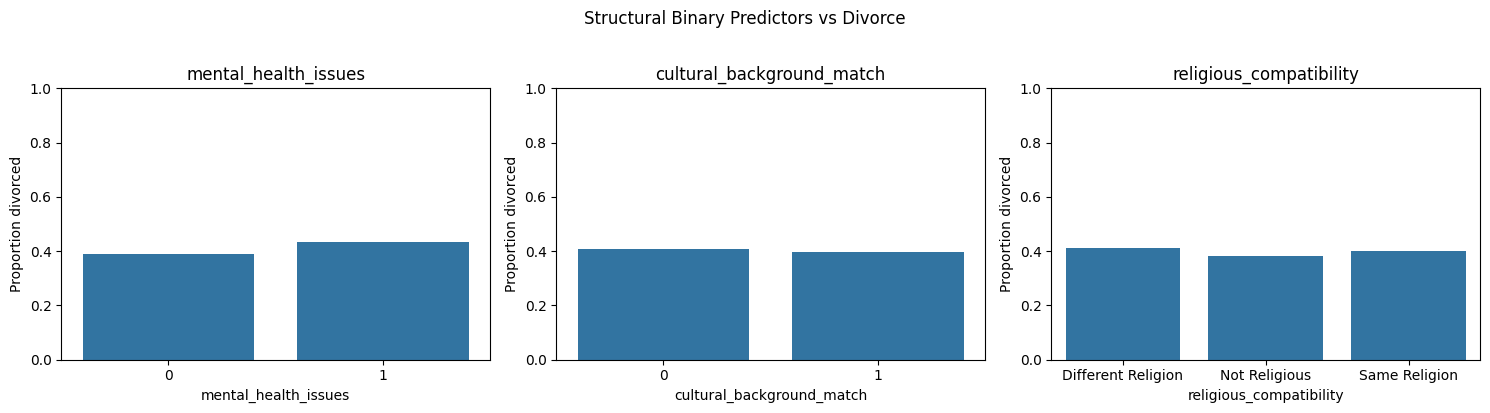

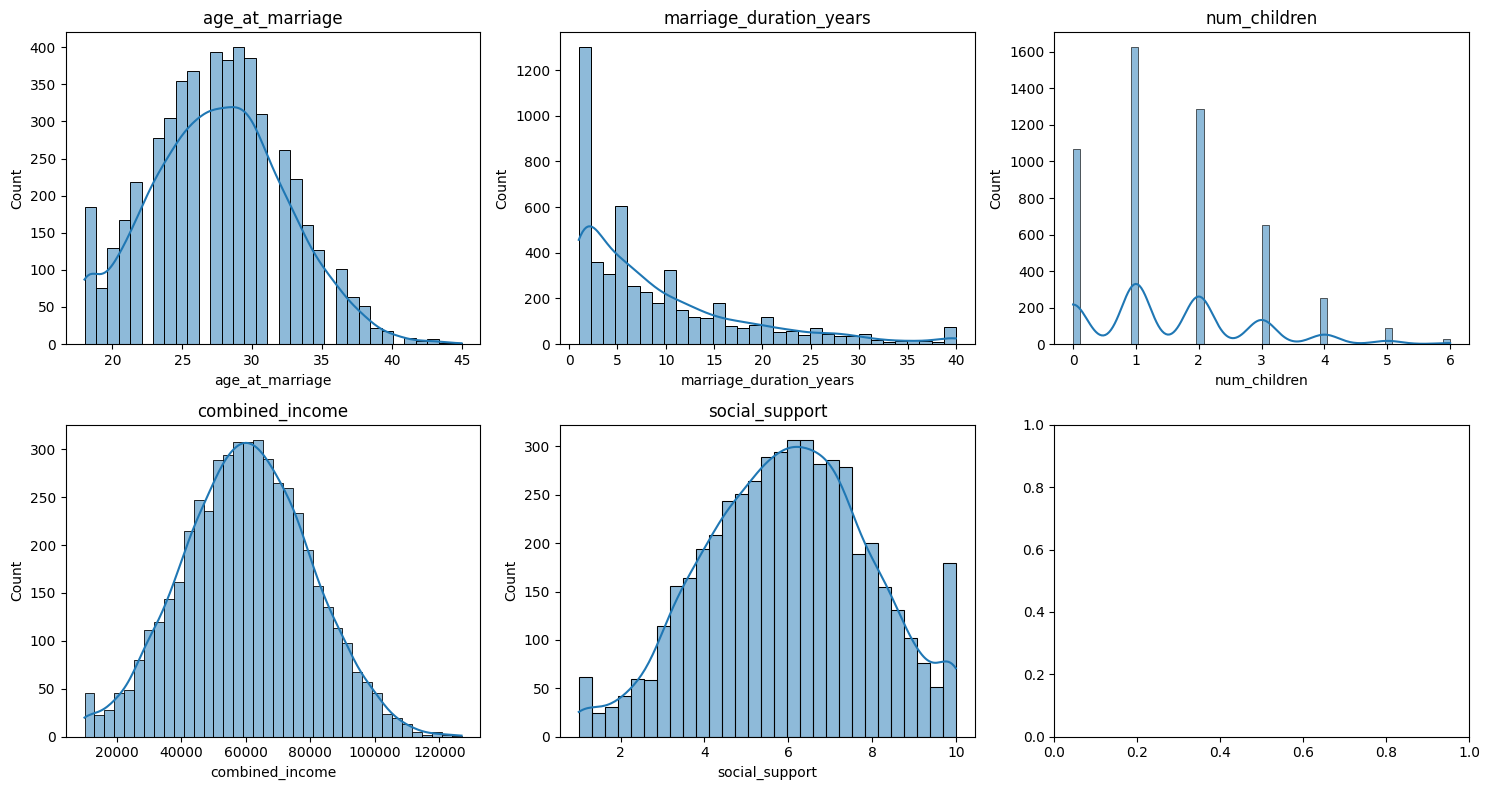

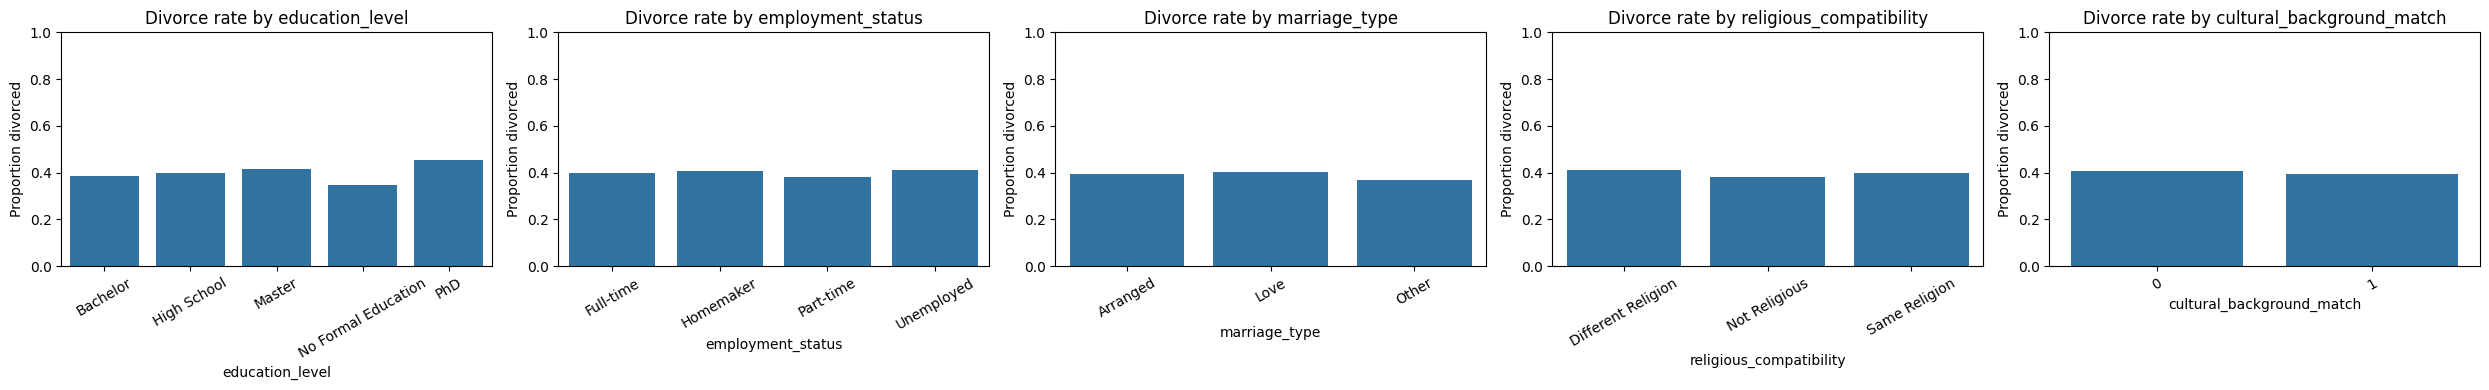

In [ ]:
# side-by-side bar plots
fig, axes = plt.subplots(1, len(structural_binary_cols), figsize=(5*len(structural_binary_cols), 4))

if len(structural_binary_cols) == 1:
    axes = [axes]

for i, col in enumerate(structural_binary_cols):
    rate_df = structural_factors.groupby(col)['divorced'].mean().reset_index()
    sns.barplot(data=rate_df, x=col, y='divorced', ax=axes[i])
    axes[i].set_ylabel('Proportion divorced')
    axes[i].set_title(f'{col}')
    axes[i].set_ylim(0, 1)

plt.suptitle('Structural Binary Predictors vs Divorce', y=1.02)
plt.tight_layout()
plt.show()

# histograms for continuous variables
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(structural_continuous_cols):
    sns.histplot(data=structural_factors, x=col, kde=True, ax=axes[i])
    axes[i].set_title(col)


plt.tight_layout()
plt.show()

# boxplots for continuous variables by divorce status
fig, axes = plt.subplots(1, len(structural_cat_cols), figsize=(5*len(structural_cat_cols), 4))

for i, col in enumerate(structural_cat_cols):
    rate_df = divorce.groupby(col)['divorced'].mean().reset_index()
    sns.barplot(data=rate_df, x=col, y='divorced', ax=axes[i])
    axes[i].set_ylabel('Proportion divorced')
    axes[i].set_title(f'Divorce rate by {col}')
    axes[i].set_ylim(0, 1)
    axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


## Interpretation:

Those with mental health issues represent greater proportion of those divorced. There is little difference in religious compatibility or cultural background match and those divorced vs not divorced. 

Social support and combined income are normally distributed, with the averages falling in the middle. Age at marriage, marriage duration, and number of children exhibit a positive skew, showing overall higher values, with a few outliers pulling the mean to the right.

Those with no formal education represent the smallest proportion of divorced couples and those with a PhD represent the highest. There are little difference between proportion of those divorced and employment status, marriage type, religious compatibility, and cultural background match.

## Data Preprocessing

### Dealing with categorical variables

We convert categorical data into a numerical format that a model can process. We treat the same and no religion due to effect of indifference. For the rest we apply one-hot encoding to eliminate false ordinality.

#### Structural Factors

In [ ]:
# map religious variables 
religious_mapping = {'Not Religious': 0, 'Same Religion': 0, 'Different Religion': 1}
structural_factors['religious_compatibility'] = structural_factors['religious_compatibility'].map(religious_mapping)

/var/folders/5j/xvq3djdx3cv6jj_37tz6mq5r0000gn/T/ipykernel_2830/1365352957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  structural_factors['religious_compatibility'] = structural_factors['religious_compatibility'].map(religious_mapping)


In [165]:
# one-hot encoding for employment_status, cultural_background_match, marriage type
structural_factors = pd.get_dummies(
    structural_factors,
    columns=['employment_status', 'marriage_type', 'education_level'],
)
structural_factors.head(10)

,age_at_marriage,marriage_duration_years,num_children,combined_income,cultural_background_match,religious_compatibility,mental_health_issues,social_support,divorced,employment_status_Full-time,...,employment_status_Part-time,employment_status_Unemployed,marriage_type_Arranged,marriage_type_Love,marriage_type_Other,education_level_Bachelor,education_level_High School,education_level_Master,education_level_No Formal Education,education_level_PhD
0,30,1,1,64001,1,1,0,8.428183,1,True,...,False,False,False,True,False,True,False,False,False,False
1,27,2,2,86221,1,0,0,5.297221,1,True,...,False,False,False,True,False,False,False,True,False,False
2,31,6,0,69441,0,0,0,5.887066,1,False,...,True,False,True,False,False,False,True,False,False,False
3,35,3,2,69513,1,0,0,5.263555,0,True,...,False,False,False,True,False,True,False,False,False,False
4,26,2,2,63986,1,1,0,5.771259,1,True,...,False,False,False,True,False,False,False,False,True,False
5,26,10,0,44605,0,0,0,6.909350,0,True,...,False,False,False,True,False,False,True,False,False,False
6,35,10,2,73454,1,1,0,7.351375,0,True,...,False,False,False,True,False,False,True,False,False,False
7,31,17,1,59491,1,0,0,8.709813,1,False,...,False,True,False,True,False,False,True,False,False,False
8,25,5,1,40944,0,0,0,8.727489,0,True,...,False,False,True,False,False,True,False,False,False,False
9,30,1,0,46819,1,0,1,5.939285,1,True,...,False,False,True,False,False,False,False,False,False,True


#### Internal Factors

In [167]:
internal_factors = divorce[['communication_score', 
                            'conflict_frequency', 
                            'conflict_resolution_style', 
                            'infidelity_occurred', 
                            'counseling_attended',
                            'pre_marital_cohabitation',
                            'domestic_violence_history', 
                            'trust_score', 
                            'divorced']].copy()
internal_factors.head()

,communication_score,conflict_frequency,conflict_resolution_style,infidelity_occurred,counseling_attended,pre_marital_cohabitation,domestic_violence_history,trust_score,divorced
0,5.536016,3,Collaborative,0,0,1,0,6.262411,1
1,5.810172,3,Aggressive,1,0,1,0,6.769384,1
2,6.088146,3,Collaborative,0,0,1,0,5.532866,1
3,6.212046,3,Aggressive,0,0,1,0,3.491264,0
4,4.826262,1,Passive,0,1,1,0,10.000000,1


In [173]:
# one-hot encoding conflict_resolution_style
internal_factors = pd.get_dummies(
    internal_factors,
    columns=['conflict_resolution_style'],
)
internal_factors.head()

,communication_score,conflict_frequency,infidelity_occurred,counseling_attended,pre_marital_cohabitation,domestic_violence_history,trust_score,divorced,conflict_resolution_style_Aggressive,conflict_resolution_style_Avoidant,conflict_resolution_style_Collaborative,conflict_resolution_style_Passive
0,-0.256980,0.702445,0,0,1,0,0.119978,1,False,False,True,False
1,-0.117329,0.702445,1,0,1,0,0.382288,1,True,False,False,False
2,0.024267,0.702445,0,0,1,0,-0.257490,1,False,False,True,False
3,0.087379,0.702445,0,0,1,0,-1.313822,0,True,False,False,False
4,-0.618518,-0.713775,0,1,1,0,2.053819,1,False,False,False,True


### Normalising / Scaling

We used z-score normalisation to rescale each feature so that all variables are standardised - have standard deviation of 1 and a mean of 0. This prevents features with larger scales from dominating therby enhancing model performance.

In [174]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
structural_factors[['age_at_marriage', 'num_children', 'social_support', 'combined_income']] = scaler.fit_transform(
    structural_factors[['age_at_marriage', 'num_children', 'social_support', 'combined_income']]

)
structural_factors.head()

,age_at_marriage,marriage_duration_years,num_children,combined_income,cultural_background_match,religious_compatibility,mental_health_issues,social_support,divorced,employment_status_Full-time,...,employment_status_Part-time,employment_status_Unemployed,marriage_type_Arranged,marriage_type_Love,marriage_type_Other,education_level_Bachelor,education_level_High School,education_level_Master,education_level_No Formal Education,education_level_PhD
0,0.497663,1,-0.443161,0.192314,1,1,0,1.252390,1,True,...,False,False,False,True,False,True,False,False,False,False
1,-0.120194,2,0.358505,1.322521,1,0,0,-0.340726,1,True,...,False,False,False,True,False,False,False,True,False,False
2,0.703615,6,-1.244827,0.469017,0,0,0,-0.040598,1,False,...,True,False,True,False,False,False,True,False,False,False
3,1.527425,3,0.358505,0.472679,1,0,0,-0.357857,0,True,...,False,False,False,True,False,True,False,False,False,False
4,-0.326146,2,0.358505,0.191551,1,1,0,-0.099523,1,True,...,False,False,False,True,False,False,False,False,True,False


In [175]:
internal_factors[['communication_score', 'conflict_frequency', 'trust_score']] = scaler.fit_transform(
    internal_factors[['communication_score', 'conflict_frequency', 'trust_score']]
)
internal_factors.head()

,communication_score,conflict_frequency,infidelity_occurred,counseling_attended,pre_marital_cohabitation,domestic_violence_history,trust_score,divorced,conflict_resolution_style_Aggressive,conflict_resolution_style_Avoidant,conflict_resolution_style_Collaborative,conflict_resolution_style_Passive
0,-0.256980,0.702445,0,0,1,0,0.119978,1,False,False,True,False
1,-0.117329,0.702445,1,0,1,0,0.382288,1,True,False,False,False
2,0.024267,0.702445,0,0,1,0,-0.257490,1,False,False,True,False
3,0.087379,0.702445,0,0,1,0,-1.313822,0,True,False,False,False
4,-0.618518,-0.713775,0,1,1,0,2.053819,1,False,False,False,True


## Model Building

We use train_test_split to build a model without overfitting it to our data, allow it to learn relational dynamics but be applicable to other data.

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

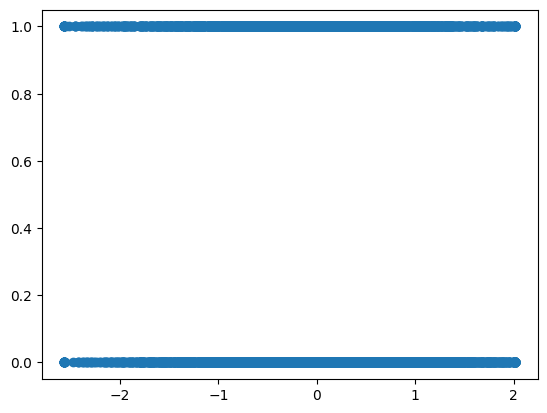

In [177]:
plt.scatter(internal_factors['communication_score'], divorce['divorced'])

## Modelling strategy:
Since we are testing on a binary outcome, the model follows logistic regression. 
We create three models:
1. Model 1: Internal-factors-only
2. Model 2: Structural-factors-only
3. Model 3: Combined model (internal + structural factors)

The purpose of this step was to classify each models performance by the correct vs incorrect predictions they made. We aimed to find the strongest predictors of divorce within each model to understand the strength of key variables.


Confusion Matrix:
[[838  65]
 [509  88]]


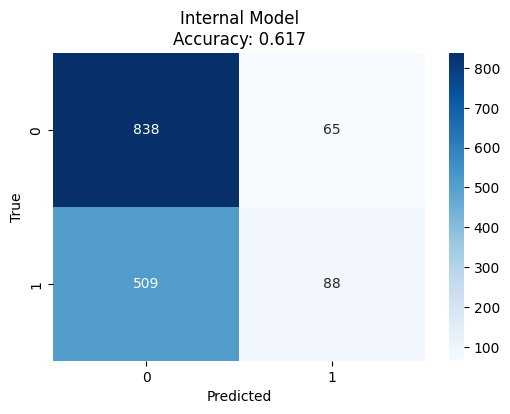

=== MODEL 1: INTERNAL FACTORS ONLY ===
Internal Factors Test Accuracy: 0.617

Top 5 strongest internal predictors:
domestic_violence_history                  0.687669
infidelity_occurred                        0.402695
conflict_resolution_style_Avoidant         0.193423
conflict_resolution_style_Collaborative    0.141012
communication_score                        0.140940
dtype: float64


In [179]:
# Model 1: internal only
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X_internal = internal_factors.drop(columns=['divorced'])
y = internal_factors['divorced']

X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(
    X_internal, y, test_size=0.3, random_state=42, stratify=y
)

# build logistic regression model
log_reg_int = LogisticRegression()
log_reg_int.fit(X_train_int, y_train_int)

internal_coeficients = pd.Series(log_reg_int.coef_[0], index=X_internal.columns)
internal_accuracy = log_reg_int.score(X_test_int, y_test_int)

# compute confusion matrix
from sklearn.metrics import confusion_matrix
y_pred_i = log_reg_int.predict(X_test_int)
cm_i = confusion_matrix(y_test_int, y_pred_i)
print("\nConfusion Matrix:")
print(cm_i)

# plot matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_i, annot=True, fmt='d', cmap='Blues')
plt.title(f'Internal Model\nAccuracy: {internal_accuracy:.3f}')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()


print("=== MODEL 1: INTERNAL FACTORS ONLY ===")
print(f"Internal Factors Test Accuracy: {internal_accuracy:.3f}")

# Top 5 coefficients
print("\nTop 5 strongest internal predictors:")
print(internal_coeficients.abs().sort_values(ascending=False).head())



Confusion Matrix:
[[915   6]
 [574   5]]
=== MODEL 2: STRUCTURAL FACTORS ONLY ===
Test Accuracy: 0.613

Top 5 strongest structural predictors:
education_level_No Formal Education    0.240155
mental_health_issues                   0.196870
marriage_type_Other                    0.153472
employment_status_Part-time            0.143199
education_level_Bachelor               0.124984
dtype: float64


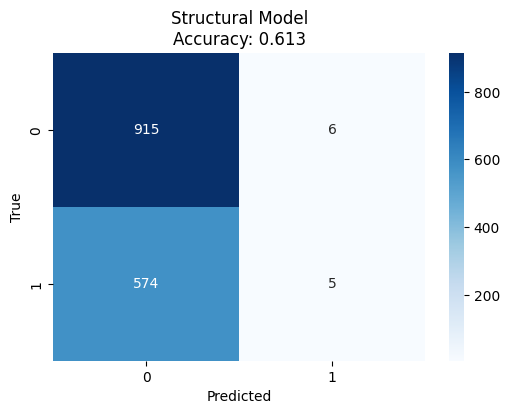

In [180]:
# Model 2: structural only
X_struct = structural_factors.drop(columns=['divorced'])
y = structural_factors['divorced']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_struct, y, test_size=0.3, random_state=42
)

logreg_struct = LogisticRegression()
logreg_struct.fit(X_train_s, y_train_s)

struct_accuracy = logreg_struct.score(X_test_s, y_test_s)
struct_coefs = pd.Series(logreg_struct.coef_[0], index=X_struct.columns)


# confusion matrix
y_pred_s = logreg_struct.predict(X_test_s)
cm_s = confusion_matrix(y_test_s, y_pred_s)
print("\nConfusion Matrix:")
print(cm_s)

plt.figure(figsize=(6,4))
sns.heatmap(cm_s, annot=True, fmt='d', cmap='Blues')
plt.title(f'Structural Model\nAccuracy: {struct_accuracy:.3f}')
plt.ylabel('True')
plt.xlabel('Predicted')

print("=== MODEL 2: STRUCTURAL FACTORS ONLY ===")
print(f"Test Accuracy: {struct_accuracy:.3f}")

# top 5 coefficients
print("\nTop 5 strongest structural predictors:")
print(struct_coefs.abs().sort_values(ascending=False).head())

=== MODEL 3: COMBINED FACTORS ===
Test Accuracy: 0.612

Top 5 strongest predictors (combined):
domestic_violence_history              0.693529
infidelity_occurred                    0.433853
education_level_No Formal Education    0.304520
mental_health_issues                   0.204375
conflict_resolution_style_Avoidant     0.164447
dtype: float64

Confusion Matrix:
[[541  52]
 [336  71]]


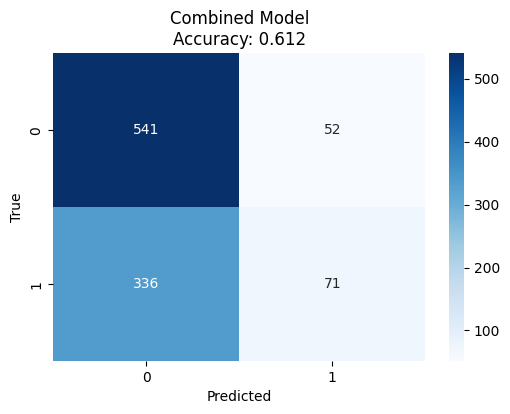

In [181]:
# Model 3: combined
combined_df = internal_factors.drop(columns=['divorced']).join(
    structural_factors.drop(columns=['divorced']),
    how='inner'
)
combined_df['divorced'] = internal_factors['divorced']  # same outcome

X_comb = combined_df.drop(columns=['divorced'])
y = combined_df['divorced']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_comb, y, test_size=0.2, random_state=42
)

logreg_comb = LogisticRegression()
logreg_comb.fit(X_train_c, y_train_c)

comb_accuracy = logreg_comb.score(X_test_c, y_test_c)
comb_coefs = pd.Series(logreg_comb.coef_[0], index=X_comb.columns)


print("=== MODEL 3: COMBINED FACTORS ===")
print(f"Test Accuracy: {comb_accuracy:.3f}")

# Top 5 coefficients
print("\nTop 5 strongest predictors (combined):")
print(comb_coefs.abs().sort_values(ascending=False).head())

# confusion matrix
y_pred_c = logreg_comb.predict(X_test_c)
cm_c = confusion_matrix(y_test_c, y_pred_c)
print("\nConfusion Matrix:")
print(cm_c)

plt.figure(figsize=(6,4))
sns.heatmap(cm_c, annot=True, fmt='d', cmap='Blues')
plt.title(f'Combined Model\nAccuracy: {comb_accuracy:.3f}')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

## Interpretation:
These findings evaluate the predictive power and accuracy of each model, highlighting strongest predictors. 

## Multiple Logistic Regression

We use multiple logistic regression to model multiple predictors simultaneously, controlling for confounding factors, identifing significant variables, and assessing how different factors influence the likelihood of divorce. The purpose of this step was assess to what entent the models explain variance in divorce, and whether adding their respective factors reduced the deviance, fitting better than the null. 


#### Internal model

In [ ]:
import statsmodels.formula.api as smf
model1 = smf.logit('divorced ~ communication_score + infidelity_occurred + domestic_violence_history', data=internal_factors).fit()
print(model1.summary())

Optimization terminated successfully.
         Current function value: 0.663487
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               divorced   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4996
Method:                           MLE   Df Model:                            3
Date:                Tue, 16 Dec 2025   Pseudo R-squ.:                 0.01307
Time:                        13:28:10   Log-Likelihood:                -3317.4
converged:                       True   LL-Null:                       -3361.4
Covariance Type:            nonrobust   LLR p-value:                 6.259e-19
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.5200      0.033    -15.982      0.000      -0.

In [202]:
dev_null = -2*model1.llnull
dev = 2*-model1.llf
print(f'Deviance of the null model: {dev_null}')
print(f'Deviance of the fitted model: {dev}')

Deviance of the null model: 6722.7507652426675
Deviance of the fitted model: 6634.873843161304


In [203]:
from scipy.stats import chi2

# computing chi-squared statistic
chi2_stat = dev_null - dev

# computing degrees of freedom
df = model1.df_model

# computing p-value
p_value = chi2.sf(chi2_stat, df)

print(f'Chi-squared statistic: {chi2_stat}')
print(f'Degrees of freedom: {df}')
print(f'p-value: {p_value}')

Chi-squared statistic: 87.87692208136377
Degrees of freedom: 3.0
p-value: 6.2590246877488925e-19


## Interpretation:

The deviance difference is the likelihood ratio, 87.88, suggesting internal relationship factors dramatically reduce deviance and the internal model fits data significantly better than a model without predictors. Communication, infidelity and domestic violence history have real impact, the observed results are not due to chance. 

#### Structural model

In [211]:
model2 = smf.logit('divorced ~ mental_health_issues + education_level_PhD + social_support', data=structural_factors).fit()
print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.670700
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               divorced   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4996
Method:                           MLE   Df Model:                            3
Date:                Tue, 16 Dec 2025   Pseudo R-squ.:                0.002343
Time:                        13:43:02   Log-Likelihood:                -3353.5
converged:                       True   LL-Null:                       -3361.4
Covariance Type:            nonrobust   LLR p-value:                  0.001275
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.4632      0.033    -13.982      0.000   

In [212]:
dev2_null = -2*model2.llnull
dev2 = 2*-model2.llf
print(f'Deviance of the null model: {dev2_null}')
print(f'Deviance of the fitted model: {dev2}')

Deviance of the null model: 6722.7507652426675
Deviance of the fitted model: 6706.999249235043


In [213]:
from scipy.stats import chi2

# chi-squared statistic
chi2_stat = dev_null - dev2

# degrees of freedom
df = model2.df_model

# p-value
p_value = chi2.sf(chi2_stat, df)

print(f'Chi-squared statistic: {chi2_stat}')
print(f'Degrees of freedom: {df}')
print(f'p-value: {p_value}')

Chi-squared statistic: 15.75151600762456
Degrees of freedom: 3.0
p-value: 0.0012750565639376914


## Interpretation:

LR stat = 15.75. The fitted structural model explains significantly more variation in divorce outcomes than the null model, but only modestly. Structural factors (education, mental health, social support) matter, but they explain much less of the divorce outcome than internal relationship dynamics.

## The Combined Model

In [221]:
# sturctural and internal factors combined
model3 = smf.logit('divorced ~ communication_score + infidelity_occurred + domestic_violence_history + mental_health_issues + social_support', 
                   data=combined_df).fit()
print(model3.summary())

Optimization terminated successfully.
         Current function value: 0.662094
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               divorced   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4994
Method:                           MLE   Df Model:                            5
Date:                Tue, 16 Dec 2025   Pseudo R-squ.:                 0.01514
Time:                        13:53:30   Log-Likelihood:                -3310.5
converged:                       True   LL-Null:                       -3361.4
Covariance Type:            nonrobust   LLR p-value:                 2.195e-20
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.5643      0.036    -15.668      0.000      -0.

In [224]:
dev_null = -2*model3.llnull
dev = 2*-model3.llf
print(f'Deviance of the null model: {dev_null}')
print(f'Deviance of the fitted model: {dev}')

Deviance of the null model: 6722.7507652426675
Deviance of the fitted model: 6620.940962978643


In [ ]:
from scipy.stats import chi2

# chi-squared statistic
chi2_stat = dev_null - dev2

# degrees of freedom
df = model3.df_model

# p-value
p_value = chi2.sf(chi2_stat, df)

print(f'Chi-squared statistic: {chi2_stat}')
print(f'Degrees of freedom: {df}')
print(f'p-value: {p_value}')

Chi-squared statistic: 15.75151600762456
Degrees of freedom: 5.0
p-value: 0.007590503686137757


## Interpretation:
The combined model is significantly better than the null. The deviance reduction / log-likelihood is the highest of all models (101.81), meaning combining agency and structural factors gives the best fit — although the gains beyond internal factors are modest.

## Odds ratios and LLR testing:

We use odds ratios to quantify the effects of significant factors, providing insight of their magnitude and direction. For logistic regression this represents the impact of predictors on the log-odds of the divorce outcome. We plot this visually for interpretability. 

We use Log-Likelihood testing to quanitfy how much better the combined model is than the individual models. This assesses if the extra parameters in the full model significantly improves explanation, balancing model simplicity and predictive power.


In [226]:
# coefficients and CIs 
params = model3.params
conf = model3.conf_int()
conf.columns = ['2.5%', '97.5%']

# OR table
or_combined = pd.DataFrame({
    'Odds Ratio': np.exp(params),
    'CI Lower': np.exp(conf['2.5%']),
    'CI Upper': np.exp(conf['97.5%']),
    'p-value': model3.pvalues
}).round(3)

or_combined

,Odds Ratio,CI Lower,CI Upper,p-value
Intercept,0.569,0.530,0.610,0.000
communication_score,0.853,0.806,0.904,0.000
infidelity_occurred,1.553,1.326,1.818,0.000
domestic_violence_history,2.069,1.599,2.678,0.000
mental_health_issues,1.232,1.070,1.418,0.004
social_support,0.934,0.882,0.989,0.019


In [253]:
# fit structural only model
X_structural_only = sm.add_constant(structural_factors[['mental_health_issues', 'social_support']])
structural_model = sm.Logit(y, X_structural_only).fit()

# LLRT test
LL_combined = model3.llf
LL_structural = structural_model.llf
LR_stat = -2 * (LL_structural - LL_combined)
p_value = chi2.sf(LR_stat, df=model3.df_model - structural_model.df_model)

print('Likelihood Ratio Statistic:', LR_stat)
print('p-value:', p_value)

Optimization terminated successfully.
         Current function value: 0.671000
         Iterations 4
Likelihood Ratio Statistic: 89.05663377067049
p-value: 3.4927531814506505e-19


## Interpretation:


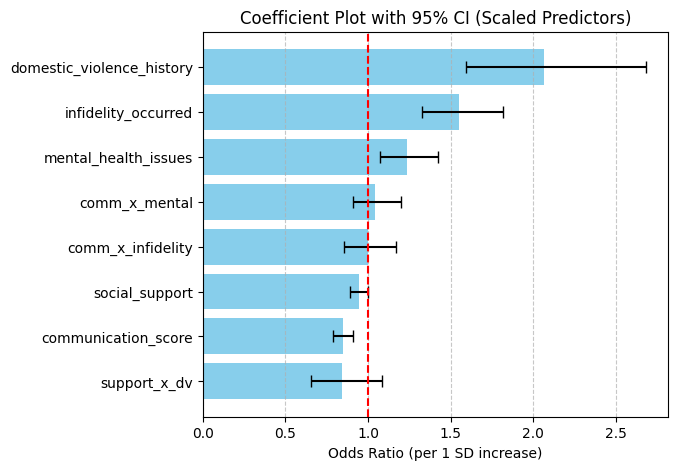

In [239]:
# coefficient plot
# dropping intercept
coef_df = coef_df[coef_df['Variable'] != 'Intercept'].reset_index(drop=True)

# sorting variables by OR magnitude 
coef_df = coef_df.sort_values('OR', ascending=True)

plt.figure(figsize=(6, 5))
plt.barh(coef_df['Variable'], coef_df['OR'], xerr=[coef_df['OR'] - coef_df['CI_lower'], 
                                                   coef_df['CI_upper'] - coef_df['OR']],
         color='skyblue', ecolor='black', capsize=4)
plt.axvline(1, color='red', linestyle='--')  # OR=1 reference line
plt.xlabel('Odds Ratio (per 1 SD increase)')
plt.title('Coefficient Plot with 95% CI (Scaled Predictors)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Interpretation:
Confidence intervals that do not cross one indicate statistically reliable effects. Internal relationship factors dominate the combined model with domestic violence and infidelity exhibiting the largest odds ratios, substantially increasing the odds of divorce. The structural variable mental health issues shows a more modest effect size, with a confidence interval closer to the null value, indicating a weaker but still significant association. Communication quality and social support are protective, with odds ratios below one. 

## Interactions:
We explored the effects of interactional variables in order to deepen the model realism by capturing conditional, non-independent relationships that better reflect lived realities. These were informed by existing literature on the subject.

communication x mental health issues captures the relational nature of communication, with reception and response varying depending on partner's psychological well-being (Girma, 2022).

social support x domestic violence history tests whether social support buffers the effect of domestic violence on divorce outcome. This is based on research that suggests social support can moderate the relationship between domestic violence and psychological well-being (Ogbe et al., 2020).


In [248]:
# adding interactions to combined model
combined_df['comm_x_mental'] = combined_df['communication_score'] * combined_df['mental_health_issues']
combined_df['support_x_dv'] = combined_df['social_support'] * combined_df['domestic_violence_history']

# fit new logistic model with interactions
model3_interact = smf.logit(
    'divorced ~ communication_score + infidelity_occurred + domestic_violence_history + mental_health_issues + social_support + comm_x_mental + support_x_dv', 
    data=combined_df
).fit()

print(model3_interact.summary())

Optimization terminated successfully.
         Current function value: 0.661885
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               divorced   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4992
Method:                           MLE   Df Model:                            7
Date:                Tue, 16 Dec 2025   Pseudo R-squ.:                 0.01545
Time:                        19:41:26   Log-Likelihood:                -3309.4
converged:                       True   LL-Null:                       -3361.4
Covariance Type:            nonrobust   LLR p-value:                 1.686e-19
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.5651      0.036    -15.681      0.000      -0.

## Interpretation:
Interactions appear insignificant - factors operate independently. This suggests that relational processes exert similar effects across structural contexts. For this reason, we will not assume interactional effects in the combined model.

## Visualising predicted probabilities:
Log-odds are difficult to interpret directly. To improve model interpretability, we computed predicted probabilities across the range of communication scores whilst keeping other predictors constant. 

Mental health issues were selected as a conditioning variable because they represent a salient structural factor that plausibly effects internal relationship dynamics (). Predicted probabilities were therefore generated separately for those with and without reported mental health issues. 

This visualisation does not test an interactional effect but does illustate how divorce risk varies across communication ranges under different structural conditions implied by the additive logistic regression model. This is a more realistic representation of the influences on marriages in the real world. Plotting predicted probabilities at low and high levels of mental health issues allows direct assessment of whether communication quality operates differently across structural conditions.

This approach aimed to preserve the nonlinearity of the logistic model while translating results into interpretable proabilities.

In [249]:
# model3 without interactions
model3 = smf.logit(
    'divorced ~ communication_score + infidelity_occurred + domestic_violence_history + mental_health_issues + social_support', 
    data=combined_df
).fit()

Optimization terminated successfully.
         Current function value: 0.662094
         Iterations 4


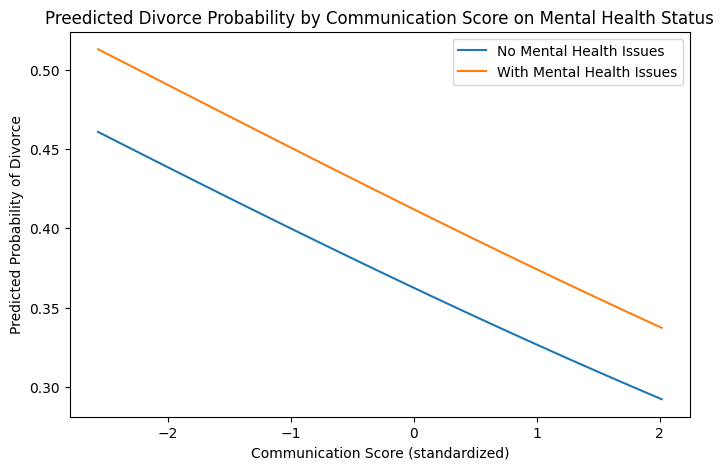

In [ ]:
comm_range = np.linspace(
    combined_df['communication_score'].min(),
    combined_df['communication_score'].max(),
    100
)
# Mental health = 0
pred_mh0 = pd.DataFrame({
    'communication_score': comm_range,
    'infidelity_occurred': 0,
    'domestic_violence_history': 0,
    'mental_health_issues': 0,
    'social_support': combined_df['social_support'].mean()
})

# Mental health = 1
pred_mh1 = pd.DataFrame({
    'communication_score': comm_range,
    'infidelity_occurred': 0,
    'domestic_violence_history': 0,
    'mental_health_issues': 1,
    'social_support': combined_df['social_support'].mean()
})

pred_mh0['predicted_prob'] = model3.predict(pred_mh0)
pred_mh1['predicted_prob'] = model3.predict(pred_mh1)

plt.figure(figsize=(8, 5))
plt.plot(comm_range, pred_mh0['predicted_prob'], label='No Mental Health Issues')
plt.plot(comm_range, pred_mh1['predicted_prob'], label='With Mental Health Issues')
plt.xlabel('Communication Score (standardized)')
plt.ylabel('Predicted Probability of Divorce')
plt.title('Predicted Divorce Probability by Communication Score on Mental Health Status')
plt.legend()
plt.show()

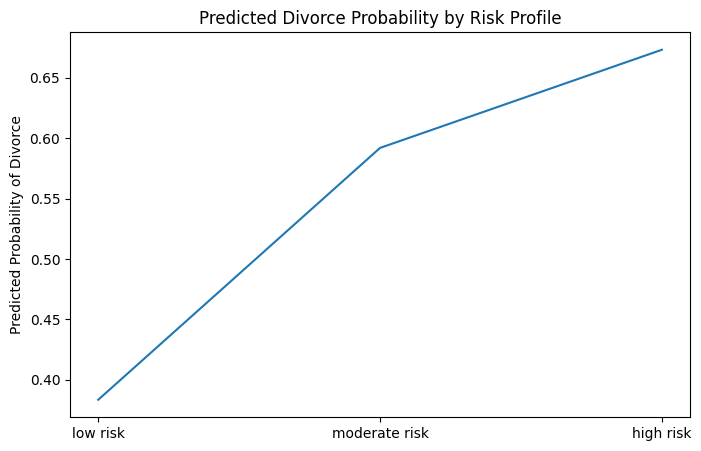

In [245]:
profiles = pd.DataFrame({
    'communication_score': [-1, 0, 1],
    'infidelity_occurred': [0, 0, 1],
    'domestic_violence_history': [0, 1, 1],
    'mental_health_issues': [0, 1, 1],
    'social_support': [1, 0, -1]
})

profiles['predicted_prob'] = model3.predict(profiles)
plt.figure(figsize=(8, 5))
plt.plot(['low risk', 'moderate risk', 'high risk'], profiles['predicted_prob'])
plt.ylabel('Predicted Probability of Divorce')
plt.title('Predicted Divorce Probability by Risk Profile')
plt.show()


## Interpretation:
The plot demonstrates a clear negative relationship between communication quality and divorce probability: as communication improves, the predicted probability of divorce declines. Mental health issues increase the risk of divorce across all communication levels. Agency and structure interact in a way where the protective effect of good communication is stronger when mental health issues are absent. 

## Marginal Effects:
Marginal effects show the direction and relative strength of the change in predicted probability of divorce for a one-unit increase in contributing factors. 
These insights provide magnitudes of agency, over abstract odds. This enables direct comparison of continuous and binary predictors on a common probability scale.

In [252]:
# compute marginal effects for variables in combined model with interactions
mfx = model3.get_margeff(at='mean')  # at mean values of other variables
mfx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:               divorced
Method:                          dydx
At:                              mean
=============================================================================================
                               dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
communication_score          -0.0379      0.007     -5.413      0.000      -0.052      -0.024
infidelity_occurred           0.1053      0.019      5.471      0.000       0.068       0.143
domestic_violence_history     0.1740      0.031      5.525      0.000       0.112       0.236
mental_health_issues          0.0499      0.017      2.907      0.004       0.016       0.084
social_support               -0.0164      0.007     -2.347      0.019      -0.030      -0.003
=============================================================================================
"""

## Interpretation: 

A 1 SD increase in communication is associated with a 4% decrease in divorce probability, when other variables are constant. 
Presence of infidelity increases divorce probability by 10.5 percentage points.
Presence of domestic violence history increases divorce probability by 17 percentage points.
resence of mental health issues increases divorce probability by 5 percentage points.
Social support offers a small protective effect, reducing divorce probability by 1.5 percentage points per SD increase.


## Predicted-probability Visualisation:
Finally, to synthesise the combined model in a visual summary, we plotted the predicted divorce probabilities across the range of communication scores while conditioning on key high-impact risk factors: infidelity, domestic violence, and mental health issues. These variables are the strongest predictors identified by odds ratios and marginal effects. 

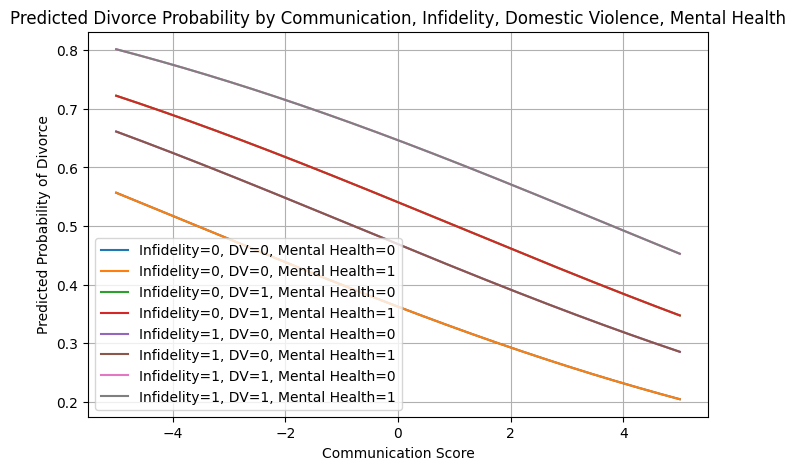

In [251]:
# predictor range
comm_range = np.linspace(-5, 5, 1000)

# df for all combinations of binary predictors
binary_combinations = pd.DataFrame([
    {'infidelity_occurred': inf, 'domestic_violence_history': dv, 'mental_health_issues': mh}
    for inf in [0, 1]
    for dv in [0, 1]
    for mh in [0, 1]
])

# predicted probabilities
plt.figure(figsize=(8,5))
for idx, row in binary_combinations.iterrows():
    X_pred = pd.DataFrame({
        'communication_score': comm_range,
        'infidelity_occurred': row['infidelity_occurred'],
        'domestic_violence_history': row['domestic_violence_history'],
        'mental_health_issues': row['mental_health_issues'],
        'mental_health_issues': 0,  
        'social_support': 0,

    })
    prob = model3.predict(X_pred)
    label = f"Infidelity={row['infidelity_occurred']}, DV={row['domestic_violence_history']}, Mental Health={row['mental_health_issues']}" 
    plt.plot(comm_range, prob, label=label)

plt.xlabel('Communication Score')
plt.ylabel('Predicted Probability of Divorce')
plt.title('Predicted Divorce Probability by Communication, Infidelity, Domestic Violence, Mental Health')
plt.legend()
plt.grid(True)
plt.show()

## Interpretation:
Higher communication is consistently associated with lower divorce probability across all contributing factor profiles. 
The non-overlapping slopes indicate that communication has a similiar protective effect across both structural and internal contexts. 

Thus, the full model is integrated into an explanative summary. Divorce is neither fully predicted by structural conditions nor entirely within individual control. This is the answer to our question: internal-relational factors undoubtedly play the dominant role in divorce outcomes, suggesting we have significant, but not complete, agency over marriage outcomes.

# References:
Girma, L. (2022). Marital Communication as Moderators of the Relationship between Marital Conflict Resolution and Marital Satisfaction. The American Journal of Family Therapy. 52. 1-12. https://doi.org/10.1080/01926187.2022.2089404

Ogbe, E., Harmon, S., Van den Bergh, R., Degomme, O. (2020). A systematic review of intimate partner violence interventions focused on improving social support and mental health outcomes of survivors. Europe PMC. 15(6). https://doi.org/10.1371/journal.pone.0235177 

Patangan, V. (2025). Divorce Prediction. [Data set]. Kaggle. https://www.kaggle.com/datasets/vanpatangan/divorce-prediction/data

Scott, S. B., Rhoades, G. K., Stanley, S. M., Allen, E. S., & Markman, H. J. (2013). Reasons for Divorce and Recollections of Premarital Intervention: Implications for Improving Relationship Education. Couple & family psychology, 2(2), 131–145. https://doi.org/10.1037/a0032025